### Create a complete text preprocessing pipeline using both NLTK and SpaCy libraries for cleaning, analyzing, and visualizing text data.

##### Key Features
* Text cleaning and normalization using multiple approaches
* Tokenization comparison between NLTK and SpaCy
* Part-of-speech tagging and named entity recognition
* Sentiment analysis using TextBlob and VADER
* Text statistics generation and visualization
* Comparative analysis between preprocessing approaches

##### Required Libraries
- NLTK
- SpaCy
- pandas
- matplotlib
- wordcloud
- textblob

In [ ]:
# !pip install wordcloud textblob vaderSentiment

In [3]:
import nltk
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
import string

In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import movie_reviews

In [6]:
nlp = spacy.load("en_core_web_sm") # loading spacy model

In [ ]:
print(movie_reviews.categories())
print(movie_reviews.fileids('pos')[:5])
print(movie_reviews.fileids('neg')[:5])

['neg', 'pos']
['pos/cv000_29590.txt', 'pos/cv001_18431.txt', 'pos/cv002_15918.txt', 'pos/cv003_11664.txt', 'pos/cv004_11636.txt']
['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt']


In [ ]:
texts = []
for fileid in movie_reviews.fileids()[:5]: # using sentences from the NLTK movie_reviews corpus as sample texts
    texts.append(' '.join(movie_reviews.words(fileid)))
df = pd.DataFrame({'text':texts})

In [19]:
print(df)

                                                text  \
0  plot : two teen couples go to a church party ,...   
1  the happy bastard ' s quick movie review damn ...   
2  it is movies like these that make a jaded movi...   
3  " quest for camelot " is warner bros . ' first...   
4  synopsis : a mentally unstable man undergoing ...   

                                          clean_text  \
0  plot  two teen couples go to a church party  d...   
1  the happy bastard  s quick movie review damn t...   
2  it is movies like these that make a jaded movi...   
3  quest for camelot  is warner bros   first feat...   
4  synopsis  a mentally unstable man undergoing p...   

                                         nltk_tokens  \
0  [plot, two, teen, couples, go, to, a, church, ...   
1  [the, happy, bastard, s, quick, movie, review,...   
2  [it, is, movies, like, these, that, make, a, j...   
3  [quest, for, camelot, is, warner, bros, first,...   
4  [synopsis, a, mentally, unstable, man, unde

##### Text cleaning and normalization

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = text.strip()
    return text

df['clean_text']=df['text'].apply(clean_text)

In [20]:
print(df.head())

                                                text  \
0  plot : two teen couples go to a church party ,...   
1  the happy bastard ' s quick movie review damn ...   
2  it is movies like these that make a jaded movi...   
3  " quest for camelot " is warner bros . ' first...   
4  synopsis : a mentally unstable man undergoing ...   

                                          clean_text  \
0  plot  two teen couples go to a church party  d...   
1  the happy bastard  s quick movie review damn t...   
2  it is movies like these that make a jaded movi...   
3  quest for camelot  is warner bros   first feat...   
4  synopsis  a mentally unstable man undergoing p...   

                                         nltk_tokens  \
0  [plot, two, teen, couples, go, to, a, church, ...   
1  [the, happy, bastard, s, quick, movie, review,...   
2  [it, is, movies, like, these, that, make, a, j...   
3  [quest, for, camelot, is, warner, bros, first,...   
4  [synopsis, a, mentally, unstable, man, unde

Tokenization comparison (NLTK vs SpaCy)

In [9]:
from nltk.tokenize import word_tokenize

In [ ]:
df['nltk_tokens'] = df['clean_text'].apply(word_tokenize)
df['spacy_tokens'] = df['clean_text'].apply(lambda x:[token.text for token in nlp(x)])

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def nltk_preprocess(tokens):
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return tokens

df['nltk_processed'] = df['nltk_tokens'].apply(nltk_preprocess)

def spacy_preprocess(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

df['spacy_processed'] = df['clean_text'].apply(spacy_preprocess)

In [22]:
print(df['spacy_processed'])

0    [plot,  , teen, couple, church, party,  , drin...
1    [happy, bastard,  , s, quick, movie, review, d...
2    [movie, like, jade, movie, viewer, thankful, i...
3    [quest, camelot,  , warner, bros,   , feature,...
4    [synopsis,  , mentally, unstable, man, undergo...
Name: spacy_processed, dtype: object


##### POS tagging and Named Entity Recognition

In [11]:
df['nltk_pos'] = df['nltk_tokens'].apply(nltk.pos_tag)
df['spacy_pos'] = df['clean_text'].apply(lambda x: [(token.text, token.pos_) for token in nlp(x)])
df['spacy_ner'] = df['text'].apply(lambda x: [(ent.text, ent.label_) for ent in nlp(x).ents])

##### Sentiment Analysis (TextBlob & VADER)

In [12]:
analyzer = SentimentIntensityAnalyzer()

df['textblob_sentiment'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['vader_sentiment'] = df['clean_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

##### Text statistics

In [ ]:
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))
df['char_count'] = df['clean_text'].apply(len)
df['avg_word_length'] = df['clean_text'].apply(lambda x: sum(len(w) for w in x.split())/(len(x.split())+1e-5))

In [23]:
df['avg_word_length']

0    4.243281
1    4.051383
2    4.402414
3    4.430862
4    4.521390
Name: avg_word_length, dtype: float64

##### Visualization - WordClouds

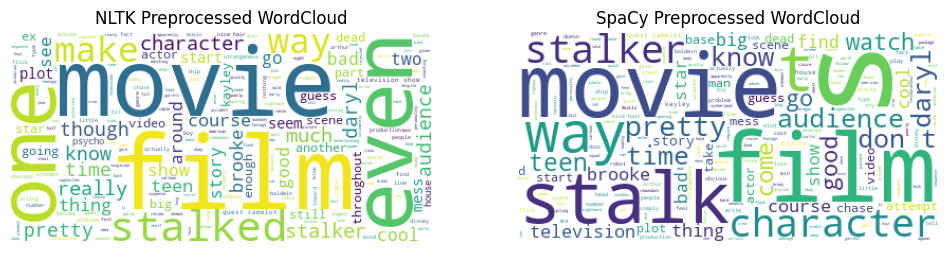

In [ ]:
all_nltk_words= ' '.join([' '.join(tokens) for tokens in df['nltk_processed']])
all_spacy_words= ' '.join([' '.join(tokens) for tokens in df['spacy_processed']])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=400, height=200, background_color='white').generate(all_nltk_words))
plt.title('NLTK Preprocessed WordCloud')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=400, height=200, background_color='white').generate(all_spacy_words))
plt.title('SpaCy Preprocessed WordCloud')
plt.axis('off')
plt.show()

##### Visualization - Sentiment Comparison

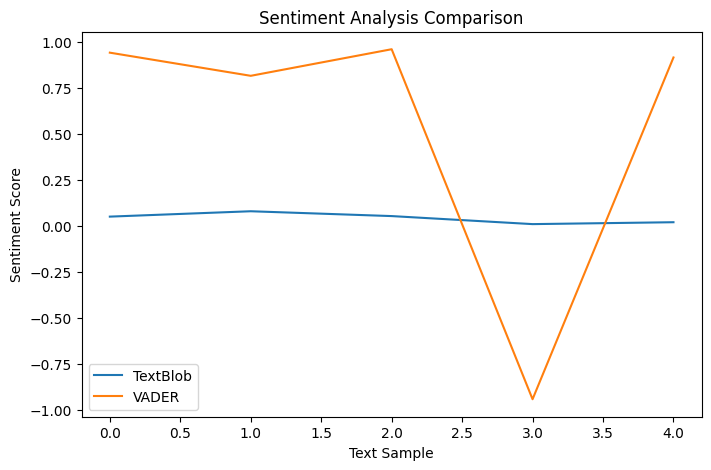

In [15]:
plt.figure(figsize=(8,5))
plt.plot(df['textblob_sentiment'], label='TextBlob')
plt.plot(df['vader_sentiment'], label='VADER')
plt.title('Sentiment Analysis Comparison')
plt.xlabel('Text Sample')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()

##### Comparative Analysis Summary

In [16]:
print("Sample Comparative Analysis:")
print(df[['text', 'nltk_processed', 'spacy_processed', 'nltk_pos', 'spacy_pos', 'spacy_ner', 'textblob_sentiment', 'vader_sentiment']])

Sample Comparative Analysis:
                                                text  \
0  plot : two teen couples go to a church party ,...   
1  the happy bastard ' s quick movie review damn ...   
2  it is movies like these that make a jaded movi...   
3  " quest for camelot " is warner bros . ' first...   
4  synopsis : a mentally unstable man undergoing ...   

                                      nltk_processed  \
0  [plot, two, teen, couple, go, church, party, d...   
1  [happy, bastard, quick, movie, review, damn, y...   
2  [movie, like, make, jaded, movie, viewer, than...   
3  [quest, camelot, warner, bros, first, feature,...   
4  [synopsis, mentally, unstable, man, undergoing...   

                                     spacy_processed  \
0  [plot,  , teen, couple, church, party,  , drin...   
1  [happy, bastard,  , s, quick, movie, review, d...   
2  [movie, like, jade, movie, viewer, thankful, i...   
3  [quest, camelot,  , warner, bros,   , feature,...   
4  [synopsis,  , 